For network data visualization we can use a number of libraries. Here we'll use [networkX](https://networkx.github.io/documentation/networkx-2.4/install.html).

In [2]:
! pip3 install networkx

In [3]:
! pip3 install pytest

In [36]:
import networkx as nx

In [11]:
! ls ../facebook_large/

README.txt                   musae_facebook_features.json
citing.txt                   musae_facebook_target.csv
musae_facebook_edges.csv


In [12]:
import pandas as pd

In [37]:
target = pd.read_csv('../facebook_large/musae_facebook_target.csv')
edges  = pd.read_csv('../facebook_large/musae_facebook_edges.csv')

In [16]:
target.shape

(22470, 4)

In [17]:
edges.shape

(171002, 2)

In [18]:
! cat ../facebook_large/README.txt 

Facebook Large Page-Page Network

Description

This webgraph is a page-page graph of verified Facebook sites. Nodes represent official Facebook pages while the links are mutual likes between sites. Node features are extracted from the site descriptions that the page owners created to summarize the purpose of the site. This graph was collected through the Facebook Graph API in November 2017 and restricted to pages from 4 categories which are defined by Facebook. These categories are: politicians, governmental organizations, television shows and companies. The task related to this dataset is multi-class node classification for the 4 site categories.

- Directed: No.
- Node features: Yes.
- Edge features: No.
- Node labels: Yes. Binary-labeled.
- Temporal: No.

|   | Facebook  |
|---|---|
| Nodes |22,470   | 
| Edges | 171,002  |
| Density |  0.001 | 
| Transitvity | 0.232| 

Possible tasks

- Multi-class node classification
- Link prediction
- Community detection



In [19]:
edges.head(5)

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829


In [21]:
target.head(10)

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician
5,5,134464673284112,Victor Dominello MP,politician
6,6,282657255260177,Jean-Claude Poissant,politician
7,7,239338246176789,Deputado Ademir Camilo,politician
8,8,544818128942324,T.C. Mezar-ı Şerif Başkonsolosluğu,government
9,9,285155655705,Army ROTC Fighting Saints Battalion,government


So, we have undirected edges `(n1 <-> n2)` stored as a tuple `(n1, n2)`, and the nodes have `3` columns, out of which `facebook_id` and `page_name` should be anonymized and not used for clustering/classification.

Let's use `networkX` to visualize this graph, and look at some histograms to get an idea of the data (like class imbalance, etc.)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

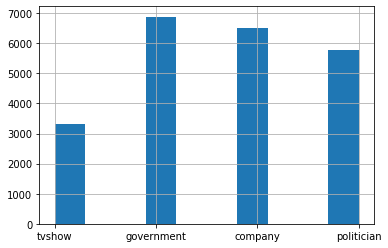

In [25]:
target['page_type'].hist()
# Note: there's some node imbalance but not that much

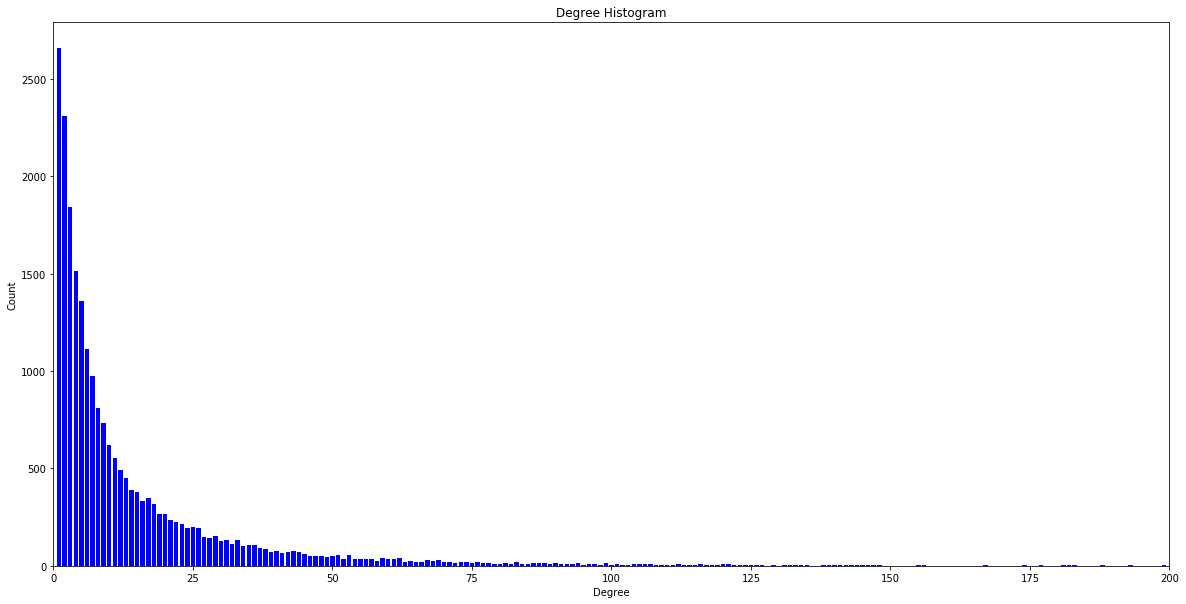

In [69]:
# visualizing the degree histogram will also give us an insight into the graph

from collections import Counter

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xlim(0, 200)
plt.show()

In [26]:
# create an empty nx Graph
G = nx.Graph()

In [28]:
# add all nodes to the graph, with page_type as the node attribute

for it, cat in zip(target['id'], target['page_type']):
    G.add_node(it, page_type=cat)

In [32]:
# add all edges, no edge attributes required rn

for n1, n2 in zip(edges['id_1'], edges['id_2']):
    G.add_edge(n1, n2)

In [50]:
# nx.draw(G, with_labels=True)
# Note: Viewing such a huge graph will take a lot of time to process
# so it's better to save the huge graph into a file, and visualize a subgraph instead

In [51]:
from matplotlib import pylab

def save_graph(graph, file_name):
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)
    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    plt.savefig(file_name, bbox_inches="tight")
    pylab.close()
    del fig

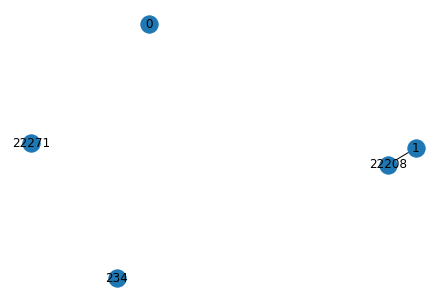

In [60]:
SG = G.subgraph(nodes=[0, 1, 22208, 22271, 234])
nx.draw(SG, with_labels = True)
# Note that it is a very sparse graph (~0.0006 density)

In [58]:
save_graph(G, 'page-page.pdf')
# Note: this will take a lot of time to run